![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='Blue'>Maratona da Ciência de Dados</font>

### <font color='GREY'> Sistema de Classificação de Risco para Concessão de Empréstimo </font>  




![alt text](https://webcomicms.net/sites/default/files/clipart/144257/animated-computer-pictures-144257-637982.gif)
![alt text](https://blog.megaconsultas.com.br/wp-content/uploads/2019/06/Recuperar-o-Score-de-Cr%C3%A9dito.gif)




# <font color='Black'> **Aula 1** </font>

#1° Problema de Negócio 

Nesse caso prático, nós precisamos construir um Sistema de classificação de Risco do cliente para aprovação de empréstimos.


![alt text](https://www.goias.gov.br/images/uploads/2017/04/Risco-de-Cr%C3%A9dito-finan%C3%A7as-contas.png)

##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

 Nesse portal a gente consegue realizar o download de vários datasets reais de empresas de todo o Mundo.

**Link**:

https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

# 2° Análise Exploratória dos Dados


In [59]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
dataset = pd.read_csv('/content/risco.csv')

In [ ]:
# Imprime na Tela os primeiros registros
dataset.head()

In [ ]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
dataset.info()

In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
dataset.shape

In [55]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.")

Dataset tem 150 linhas e 5 colunas.


In [ ]:
#Estatísticas descritivas das variáveis numéricas
dataset.describe()

In [ ]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
dataset['Risco'].value_counts()


In [ ]:
# Forma adicional de criar a Tab. de Frequência
dataset.Risco.value_counts()

In [ ]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco'])

In [ ]:
# Check for missing values
dataset.isna().sum()

In [9]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
dataset = dataset.drop(columns='id_cliente')

In [ ]:
#Printa o dataset na tela
dataset

In [ ]:
# Cria um gráfico tipo box and whisker plots (o famoso boxplot)
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

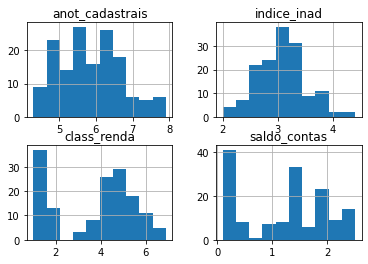

In [63]:
#cria um gráfico conhecido como histohrama
dataset.hist()
plt.show()


In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(dataset, hue='Risco', kind="reg") # kind=reg é a reta de regressão

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
sns.pairplot(dataset,kind="reg")

# 3° Pré-Processamento dos Dados

In [14]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [ ]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])

In [ ]:
X

In [ ]:
y

### Separando os dados entre Treino e Teste

In [20]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [ ]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

In [22]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [ ]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])

# <font color='Black'> **Aula 2** </font>

# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [29]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]

#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [30]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>

#5° Avaliando a Máquina Preditiva

In [ ]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)

In [ ]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [ ]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=0)

#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)

#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


In [43]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

In [ ]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)


print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

In [ ]:
# Imprimindo a Confusion Matrix
print(cm)

# <font color='Black'> **Aula 3** </font>

# <font color='Blue'>6° Deploy - Implementando a Maquina Preditiva na WEB</font>


### **Passo a Passo** Implementação do Sistema de Classificação de Risco do Cliente:

**1°** Realizar o download da ferramenta "Visual Studio Code" no link abaixo:

https://code.visualstudio.com/

**2°** Instalar a ferramenta: Clicar em "next" e "finish" (simples assim...)

**3°** Criar um diretório "app" no seu Drive "C"

Ex: **C:\app**

**4°** Fazer o Download da pasta "maratona" disponibilizada na página da maratona e via Canal no Telegram.

**5°** Salvar essa pasta dentro do diretório app. 

Ex: **C:\app\maratona** 



**Obs:** dentro da pasta maratona temos 3 arquivos:

1° risco.csv                           - Nossa fonte de dados

2° app_risco.py                        - Nosso Aplicativo web

3° Sistema_Classificação_Risco.ipynb   - Nosso Script de Criação da Máquina Preditiva

**6°** Abrir o VS Code e clicar no menu "File", depois "Open Folder" e vai navegar até o diretório **"C:\app\maratona"**

**7°** Vai no menu "terminal", depois "New Terminal". Perceba que vai abrir, lá embaixo, um terminal de comando, tipo o "CMD" (tela preta) do windows.

**8°** executar os seguinte comandos:

a) pip install plotly     +  tecla enter

b) pip install streamlit  +  tecla enter


**9°** Executar o comando de abertura do nosso LINDO sistema:

   streamlit run app_risco.py

obs: Nosso sistema vai abrir na WEB. Ver no seu navegador web.

# Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

![alt text](https://miro.medium.com/max/625/1*XBWI6eNVLS_70s1qS46E1w.gif)